In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# from pyLIMA import event
# from pyLIMA import telescopes
# from pyLIMA.models import PSPL_model
# from pyLIMA.models import FSPL_model
# from pyLIMA.models import FSPLarge_model
# from pyLIMA.models import PSBL_model

# from pyLIMA.models import FSBL_model
# # from pyLIMA.models import DSPL_model
# #in v2 we need to separately call plots.
# from pyLIMA.outputs import pyLIMA_plots
# # import ipywidgets as widgets
# # from ipywidgets import interactive,interact, HBox, Layout,VBox
# from IPython.display import display

OrderedDict([('t0', 2457777.777), ('u0', 0.3), ('tE', 100), ('rho', 0.001), ('separation', 0.1), ('mass_ratio', 0.000125), ('alpha', 2), ('fsource_Simulation', None), ('fblend_Simulation', None), ('v_para', 1000), ('v_perp', 600), ('v_radial', 600)])


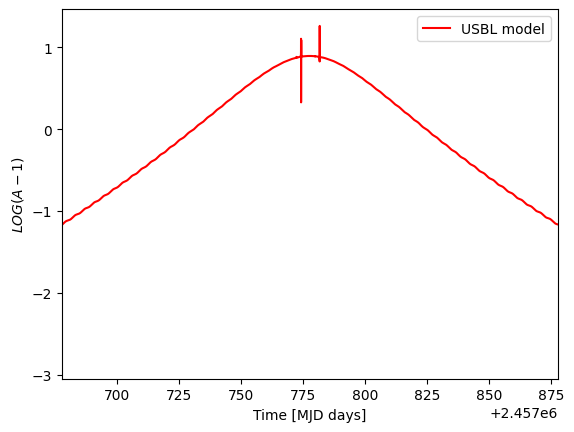

In [4]:

import numpy as np
import matplotlib.pyplot as plt
from pyLIMA import event
from pyLIMA import telescopes
from pyLIMA.models import USBL_model

from pyLIMA.models import PSBL_model

from collections import OrderedDict

simulated_event = event.Event(ra = 170, dec=-70)
simulated_event.name = 'Simulated'   
t0guess = 2457777.777

time_sim = np.linspace(t0guess-200,t0guess+200,50000)      
lightcurve_sim = np.c_[time_sim,[19.] * len(time_sim),[0.01] * len(time_sim)]

telescope = telescopes.Telescope(name='Simulation',
                                 camera_filter='I',
                                 lightcurve = lightcurve_sim.astype(float),
                                 lightcurve_names = ['time','mag','err_mag'],
                                 lightcurve_units = ['JD','mag','err_mag'],
                                     )

simulated_event.telescopes.append(telescope)
t0=t0guess

u0=0.3
tE=100
rho=0.001
s=0.1
q=1.25e-4
alpha=2
v_para = 1000
v_perp = 600
v_radial = 600


usbl = USBL_model.USBLmodel(simulated_event, parallax=['None',0], orbital_motion=['2D', t0])

# Initialize the OrderedDict
pyLIMA_parameters = OrderedDict([
    ('t0', t0),
    ('u0', u0),
    ('tE', tE),
    ('rho', rho),
    ('separation', s),
    ('mass_ratio', q),
    ('alpha', alpha),
    ('fsource_Simulation', None),
    ('fblend_Simulation', None)
])
pyLIMA_parameters['v_para'] = v_para
pyLIMA_parameters['v_perp'] = v_perp
pyLIMA_parameters['v_radial'] = v_radial

print(pyLIMA_parameters)

magnification = usbl.model_magnification(telescope, pyLIMA_parameters)
magnification
log_magnification = np.log(magnification-1)
# %matplotlib widget
plt.plot(time_sim,log_magnification,"r",label="USBL model")
plt.xlim(t0-tE,t0+tE)

plt.xlabel("Time [MJD days]")
plt.ylabel("$LOG(A-1)$")
plt.legend()
plt.show()       
plt.close()

In [5]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool


p = figure(
    title="USBL Model",
    x_axis_label="Time [MJD days]",
    y_axis_label="LOG(A-1)",
    x_range=(t0 - tE, t0 + tE),
    tools="pan,box_zoom,reset,save"
)

# Add the plot
p.line(time_sim, log_magnification, color="red", legend_label="USBL model", line_width=2)

# Add hover tool for interactivity
hover = HoverTool(
    tooltips=[("Time", "@x"), ("LOG(A-1)", "@y")],
    mode='vline'
)
p.add_tools(hover)

# Customize legend and layout
p.legend.location = "top_left"
p.legend.click_policy = "hide"

# Show the plot
show(p)